# Free stock market APIs

주식 시장 데이터 API는 현재 시장에서 거래되는 금융 자산에 대한 실시간 또는 과거 데이터를 제공합니다. 이러한 API는 일반적으로 공개 주식, ETF, ETN의 가격을 제공합니다.  
이러한 데이터는 거래 전략을 수립하고 시장을 모니터링하는 기반이 되는 기술 지표를 생성하는 데 사용할 수 있습니다. 

# 1. 야후 파이낸스
문서: [yfinance](https://github.com/ranaroussi/yfinance)  
tutorial: https://aroussi.com/post/python-yahoo-finance

In [ ]:
# pip install -U yfinance

In [1]:
import matplotlib.pyplot as plt
import yfinance as yf

- 미국 주식

In [2]:
df = yf.download('AAPL', start='2022-01-01', progress=False, multi_level_index=False)
df.tail()

YF.download() has changed argument auto_adjust default to True


,Close,High,Low,Open,Volume
Date,,,,,
2025-03-17,214.000000,215.220001,209.970001,213.309998,48073400
2025-03-18,212.690002,215.149994,211.490005,214.160004,42432400
2025-03-19,215.240005,218.759995,213.750000,214.220001,54385400
2025-03-20,214.100006,217.490005,212.220001,213.990005,48862900
2025-03-21,218.270004,218.839996,211.279999,211.559998,93954500


- 한국 주식

In [5]:
df = yf.download('005930.KS', start='2022-01-01', progress=False, multi_level_index=False) #삼성전자
df.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2025-03-17,57600.0,57800.0,55400.0,55500.0,35559021
2025-03-18,57600.0,59000.0,57300.0,58800.0,28138594
2025-03-19,58500.0,59200.0,57400.0,57400.0,29421759
2025-03-20,60200.0,60300.0,58500.0,59200.0,34989004
2025-03-21,61700.0,61700.0,60400.0,60900.0,40155612


# 2. Pandas data_reader & FinanceDataReader

[pandas-datareader](https://github.com/pydata/pandas-datareader)는 잘 구성된 시계열 데이터 수집 라이브러리로 사용이 간편하고 다양한 시계열 데이터를 수집할 수 있다는 장점이 있다. 하지만, 거래소별(KRX, NASDAQ, NYSE 등) 전체 종목 코드(ticker symbol)를 가져오는 기능이 없으며, 야후 파이낸스가 더 이상지원되지 않고(deprecated), 구글 파이낸스는 UNSTABLE_WARNING + RemoteDataError 를 낸다.

[FinanceDataReader](https://github.com/FinanceData/FinanceDataReader)는 pandas-datareader 를 대체하기 보다 보완하기 위한 목적으로 만들어졌다. 주요한 기능은 다음과 같다.

- 종목 코드  
거래소별 전체 종목코드: KRX (KOSPI, KODAQ, KONEX), NASDAQ, NYSE, AMEX, S&P 500  


- 가격 데이터  
해외주식 가격 데이터: AAPL(애플), AMZN(아마존), GOOG(구글) 등  
국내주식 가격 데이터: 005930(삼성전자), 091990(셀트리온헬스케어) 등  
각종 지수: KS11(코스피지수), KQ11(코스닥지수), DJI(다우지수), IXIC(나스닥 지수), US500(S&P 5000)  
환율 데이터: USD/KRX (원달러 환율), USD/EUR(달러당 유로화 환율), CNY/KRW: 위엔화 원화 환율  
암호화폐 가격: BTC/USD (비트코인 달러 가격, Bitfinex), BTC/KRW (비트코인 원화 가격, 빗썸)  

In [6]:
# !pip install --upgrade pandas-datareader
# !pip install --upgrade finance-datareader

In [7]:
import pandas_datareader as data_reader
import FinanceDataReader as fdr
import datetime

start = datetime.datetime(2020, 2, 19)
end = datetime.datetime(2022, 3, 4)

- 미국 주식

In [8]:
stock = fdr.DataReader('AAPL' , start=start, end=end)  #APPLE 주식
stock.head()

,Open,High,Low,Close,Volume,Adj Close
2020-02-18,78.839996,79.937500,78.652496,79.750000,152531200,77.414619
2020-02-19,80.000000,81.142502,80.000000,80.904999,93984000,78.535789
2020-02-20,80.657501,81.162498,79.552498,80.074997,100566000,77.730080
2020-02-21,79.654999,80.112503,77.625000,78.262497,129554000,75.970665
2020-02-24,74.315002,76.044998,72.307503,74.544998,222195200,72.362015


- 한국 주식

In [9]:
stock = fdr.DataReader('005930', start=start, end=end)  # 삼성전자
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-02-19,59800,60400,59400,60200,12951496,0.006689
2020-02-20,60700,61300,59600,60000,14591924,-0.003322
2020-02-21,58800,59800,58500,59200,13777393,-0.013333
2020-02-24,57400,58100,56800,56800,25627537,-0.040541
2020-02-25,56200,58000,56200,57900,23885408,0.019366


- 원-달러 환율

In [10]:
df = data_reader.DataReader('DEXKOUS', 'fred', '2022-01-01')
df.head()

,DEXKOUS
DATE,
2022-01-03,1191.39
2022-01-04,1193.77
2022-01-05,1196.38
2022-01-06,1205.02
2022-01-07,1200.78


In [11]:
df.tail()

,DEXKOUS
DATE,
2025-03-10,1456.74
2025-03-11,1453.07
2025-03-12,1451.70
2025-03-13,1455.76
2025-03-14,1451.76


<Axes: xlabel='DATE'>

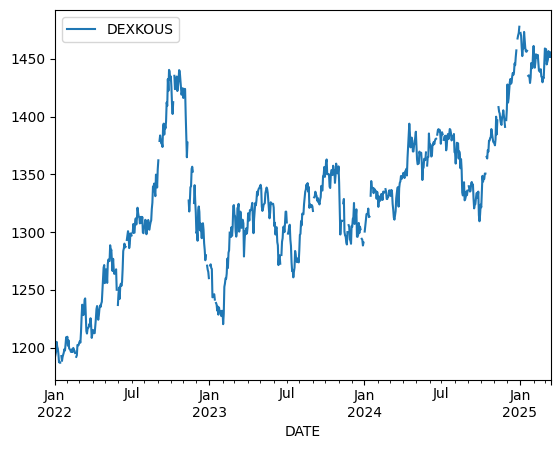

In [12]:
df.plot()

- DataReader

In [13]:
stock = fdr.DataReader("068270", start)  #셀트리온
stock

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-02-19,164928,165815,159609,160941,833238,-0.016265
2020-02-20,161381,161825,156505,158724,849423,-0.013775
2020-02-21,156505,160495,156062,156951,506103,-0.011170
2020-02-24,152958,154730,149855,149857,866854,-0.045199
2020-02-25,149856,153402,149412,152961,641598,0.020713
...,...,...,...,...,...,...
2025-03-17,187900,188200,184200,187800,414566,0.009135
2025-03-18,188500,190700,187200,187400,448355,-0.002130
2025-03-19,187300,189000,186900,187200,317459,-0.001067


<Axes: xlabel='Date'>

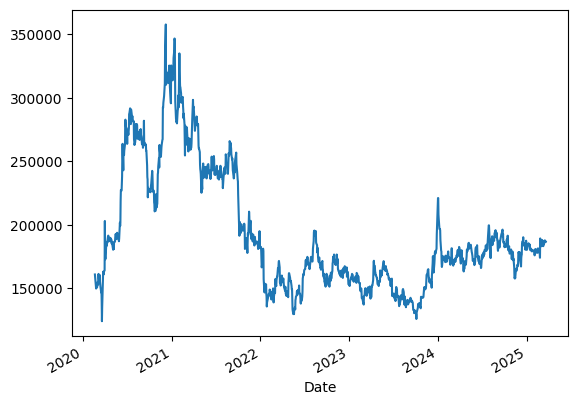

In [14]:
stock["Close"].plot()